In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Reshape

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
(X_train,y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [19]:
X_train = X_train/255
X_test = X_test/255

# for color
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [20]:
# modeling
model = Sequential()

model.add(Conv2D(input_shape=[28,28,1],filters=16,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(28*28,activation='sigmoid'))
model.add(Reshape((28,28)))

model.compile(optimizer='adam',loss='mean_squared_error')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                173120    
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                      

In [21]:
model.fit(X_train,X_train,batch_size=64,epochs=20,validation_data=(X_test,X_test))

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0275 - val_loss: 0.0157
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0136 - val_loss: 0.0124
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0117 - val_loss: 0.0114
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0106 - val_loss: 0.0107
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0100 - val_loss: 0.0101

In [23]:
y_pred = model.predict(X_test)
y_pred.shape

(10000, 28, 28)

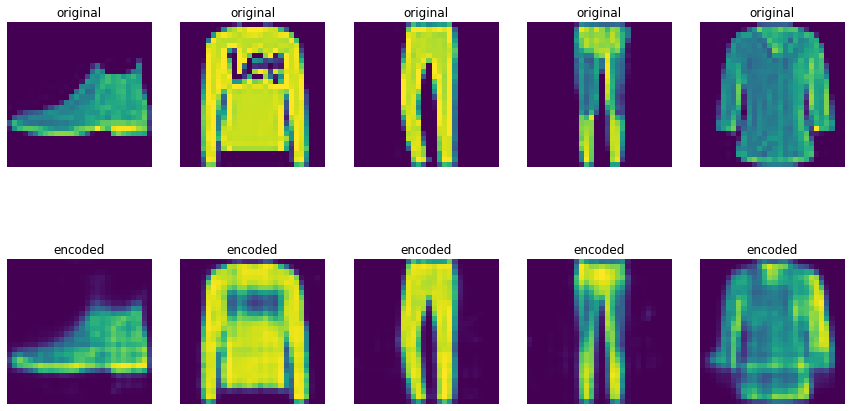

In [25]:
plt.figure(figsize=(15,8))
for i in range(5):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.title('original')
    plt.axis(False)
    
    ax2 = plt.subplot(2,5,i+1+5)
    plt.imshow(y_pred[i].reshape(28,28))
    plt.title('encoded')
    plt.axis(False)